In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [22]:
fake = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")
true = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")

In [23]:
fake.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [24]:
fake["subject"].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [25]:
true["subject"].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [26]:
fake["category"] = 1
true["category"] = 0

In [27]:
df = pd.concat([fake,true]).reset_index(drop=True)

In [28]:
df.tail()

,title,text,subject,date,category
42829,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
42830,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
42831,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
42832,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
42833,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [29]:
df.category

0        1
1        1
2        1
3        1
4        1
        ..
42829    0
42830    0
42831    0
42832    0
42833    0
Name: category, Length: 42834, dtype: int64

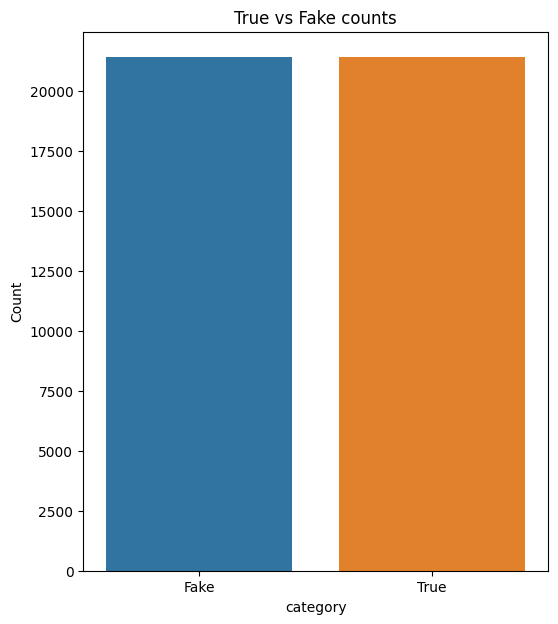

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df.copy()
df2['category'] = df2['category'].map({0: 'True', 1: 'Fake'})

plt.figure(figsize=(6,7))
ax = sns.countplot(x='category', data=df2)
ax.set_ylabel('Count')
ax.set_title('True vs Fake counts')
plt.show()


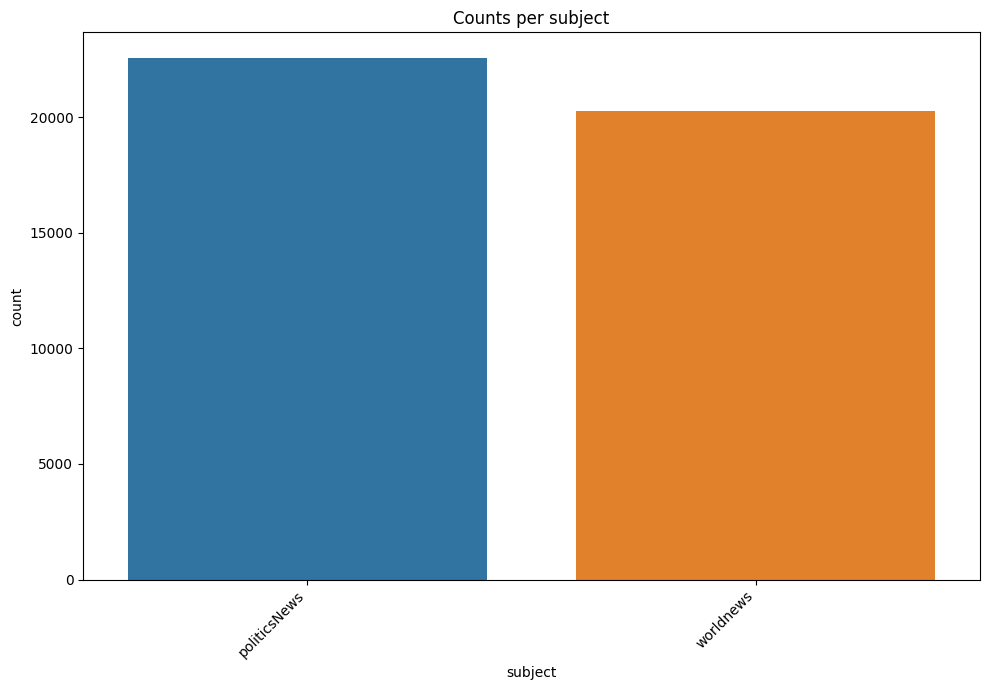

In [31]:
plt.figure(figsize=(10,7))
sns.countplot(x='subject', data=df)         # pass column name + data
plt.xticks(rotation=45, ha='right')         # rotate if labels overlap
plt.title('Counts per subject')
plt.tight_layout()
plt.show()


In [32]:
df = df[["text","category"]]

In [33]:
df.head()

,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [34]:
df.tail()

,text,category
42829,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
42830,"LONDON (Reuters) - LexisNexis, a provider of l...",0
42831,MINSK (Reuters) - In the shadow of disused Sov...,0
42832,MOSCOW (Reuters) - Vatican Secretary of State ...,0
42833,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,0


In [35]:
len(df.isna().sum())

2

In [36]:
df.isna().sum()*100/len(df)

text        0.0
category    0.0
dtype: float64

In [37]:
blanks = []

for index, text in df["text"].items():  
    if text.isspace():  
        blanks.append(index)
len(blanks)

2

In [38]:
blanks

[8970, 30387]

In [39]:
df["text"][8971]

'(Reuters) - The U.S. Supreme Court is set to rule on Monday on a legal challenge by abortion providers to a Texas law requiring doctors performing the procedure to have “admitting privileges” at local hospitals and clinics to meet hospital-grade standards.  Following is a timeline of that challenge. July 2013 - The Republican-led Texas legislature passes and Republican Governor Rick Perry signs the law known as H.B. 2, putting new requirements on abortion providers. State officials say the law is intended to ensure the health and safety of women. September 2013 – Before the law is enforced, Planned Parenthood and other abortion providers challenge the measure. They assert that certain provisions, including one related to doctors’ “admitting privileges” - a type of formal affiliation - at a hospital within 30 miles (48 km) of an abortion clinic, are aimed at decreasing the abortion availability in the state. October 2013 – A U.S. district judge sides largely with the challengers, block

In [40]:
df.drop(blanks, inplace=True)

In [41]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import spacy
import re

In [43]:
nlp = spacy.load("en_core_web_sm")
lemma=WordNetLemmatizer()

In [45]:
l1 = nlp.Defaults.stop_words
print(len(l1))
l2 = stopwords.words("english")
print(len(l2))
Stopwords = set((set(l1)|set(l2)))
print(len(Stopwords))

326
198
401


In [53]:
def cltxt(text):
    string = ""
    
    text = text.lower()
    
    wdict ={"i'm":"i am",
           "he's":"he is",
           "she's":"she is",
            "that's":"that is",
            "what's":"what is",
            "where's":"where is",
            "\'ll":"will",
            "\'ve":" have",
            "\'re":" are",
            "\'d":" would",
            "won't":"will not",
            "can't":"cannot"
           }
    for i in wdict:
        text = re.sub(i , wdict[i],text)
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)

    for word in text.split():
        if word not in Stopwords:
            string += lemma.lemmatize(word)+" "
    return string        

In [57]:
example = df["text"][8971]
cltxt(example)

'reuters u supreme court set rule monday legal challenge abortion provider texas law requiring doctor performing procedure admitting privilege local hospital clinic meet hospital grade standard following timeline challenge july 2013 republican led texas legislature pass republican governor rick perry sign law known h b 2 putting new requirement abortion provider state official law intended ensure health safety woman september 2013 law enforced planned parenthood abortion provider challenge measure assert certain provision including related doctor admitting privilege type formal affiliation hospital 30 mile 48 km abortion clinic aimed decreasing abortion availability state october 2013 u district judge side largely challenger blocking admitting privilege provision march 2014 new orleans based u court appeal 5th circuit regional federal appeal court covering texas louisiana mississippi revers lower court permit law effect april 2014 woman health abortion provider bring new complaint texa

In [58]:
from wordcloud import WordCloud

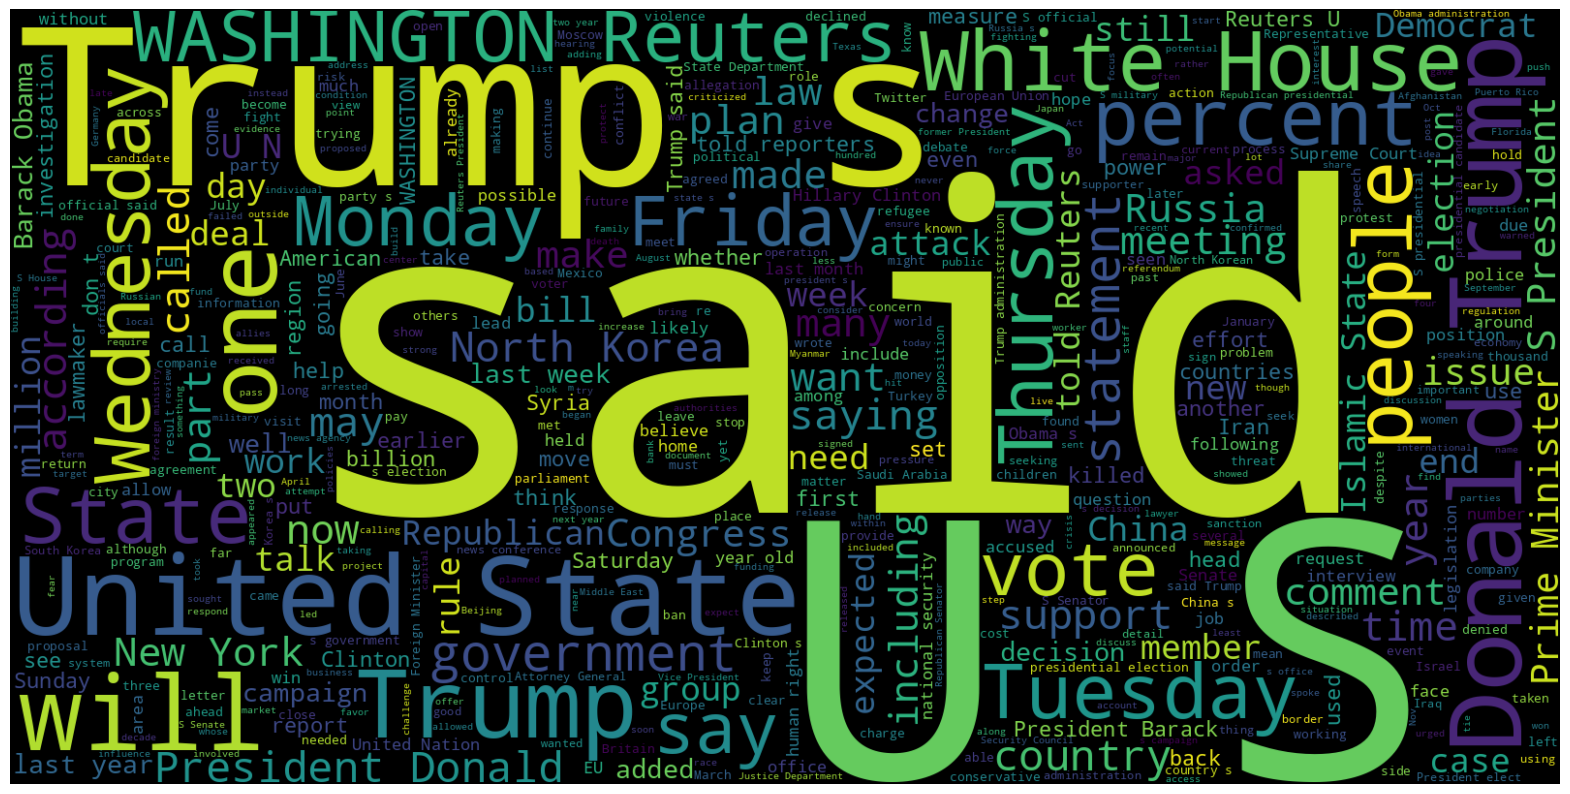

In [60]:
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.category == 1].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')